In [1]:
import tensorflow as tf
import cv2 as cv
import matplotlib.pyplot as plt

In [4]:
model = tf.keras.models.load_model('Data/Sign_Language_Model.h5')

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 efficientnetb1 (Functional  (None, None, None, 1280   6575239   
 )                           )                                   
                                                                 
 average_pooling2d (Average  (None, 1, 1, 1280)        0         
 Pooling2D)                                                      
                                                                 
 dense (Dense)               (None, 1, 1, 128)         163968    
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 28)                3612  

In [9]:
def preprocess(image):
    gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    resize_image = cv.resize(gray_image, (64, 64))
    input_image = tf.expand_dims(resize_image, axis=-1)
    input_image = tf.expand_dims(input_image, axis=0)
    return input_image

In [11]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'Nothing', 'O', 'P', 'Q', 'R', 'S', 'Space', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

In [14]:
image = cv.imread('Data/sign1.jpeg')

1/1 [==============================] - 0s 59ms/step


(-0.5, 1279.5, 1279.5, -0.5)

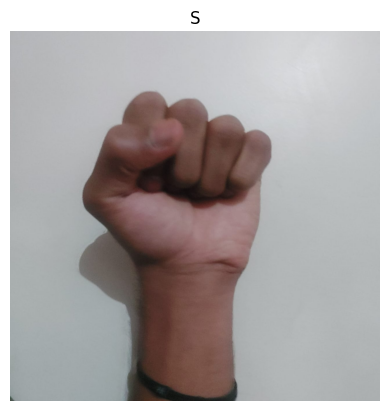

In [15]:
pred = model.predict(preprocess(image)).argmax()
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title(class_names[pred])
plt.axis(False)

In [18]:
video = cv.VideoCapture(0)
while True:
    ret, frame = video.read()
    if not ret:
        break
    frame = cv.flip(frame, 1)
    cv.imshow('', frame)
    if cv.waitKey(1) & 0xFF == ord('q'):
        break
video.release()
cv.destroyAllWindows()

In [26]:
import mediapipe as mp

mp_hands = mp.solutions.hands
hands = mp_hands.Hands()

video = cv.VideoCapture(0)
while True:
    ret, frame = video.read()
    if not ret:
        break
        
    frame = cv.flip(frame, 1)
    results = hands.process(frame)

    if results.multi_hand_landmarks:
        hand_landmark = results.multi_hand_landmarks[0]

        h, w, c = frame.shape
        x_min, y_min = w, h
        x_max, y_max = 0, 0

        for lm in hand_landmark.landmark:
            x, y = int(lm.x * w), int(lm.y * h)
            x_min = min(x_min, x)
            y_min = min(y_min, y)
            x_max = max(x_max, x)
            y_max = max(y_max, y)

        padding = 50
        x_min = max(x_min - padding, 0)
        y_min = max(y_min - padding - 30, 0)
        x_max = min(x_max + padding, w)
        y_max = min(y_max + padding + 40, h)

        cv.rectangle(frame, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
        roi = frame[y_min:y_max, x_min:x_max]
        pre_roi = preprocess(roi)
        
        pred = model.predict(pre_roi).argmax()
        cv.putText(roi, class_names[pred], (10, 20), cv.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv.LINE_AA)

    cv.imshow('', frame)
    if cv.waitKey(5) & 0xFF == ord('q'):
        break

video.release()
cv.destroyAllWindows()

1/1 [==============================] - 0s 45ms/step
